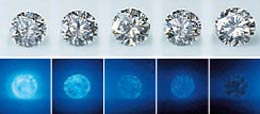

In [1]:
# לכתוב סוגי משתנים- קטגוריאלים, אורדינלים ומספריים

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\Israel Gitler\Desktop\Diamonds-price-prediction-model\scraped_Diamonds", sep = ',')
df.head()

,url,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price
0,https://www.jamesallen.com/loose-diamonds/roun...,0.31,L,SI2,Excellent,Excellent,Round,Excellent,None,4.34x4.37,1.01,GIA,$290
1,https://www.jamesallen.com/loose-diamonds/roun...,0.24,F,I1,Very Good,Very Good,Round,Very Good,None,3.92x3.93,1.00,GIA,$290
2,https://www.jamesallen.com/loose-diamonds/roun...,0.30,I,I1,Very Good,Very Good,Round,Very Good,None,4.27x4.23,1.01,GIA,$290
3,https://www.jamesallen.com/loose-diamonds/roun...,0.25,M,VS1,Excellent,Excellent,Round,Excellent,None,4.05x4.08,1.01,GIA,$290
4,https://www.jamesallen.com/loose-diamonds/prin...,0.31,J,VS1,Very Good,Excellent,Princess,Good,Medium,3.57x3.56,1.00,GIA,$290


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           8334 non-null   object 
 1   carat         8232 non-null   float64
 2   color         8232 non-null   object 
 3   clarity       8232 non-null   object 
 4   cut           5242 non-null   object 
 5   polish        8232 non-null   object 
 6   shape         8232 non-null   object 
 7   symmetry      8232 non-null   object 
 8   fluorescence  8232 non-null   object 
 9   lw            8232 non-null   object 
 10  lw_ratio      8232 non-null   float64
 11  certificate   8232 non-null   object 
 12  price         8334 non-null   object 
dtypes: float64(2), object(11)
memory usage: 846.5+ KB


In [5]:
df.isna().sum()

url                0
carat            102
color            102
clarity          102
cut             3092
polish           102
shape            102
symmetry         102
fluorescence     102
lw               102
lw_ratio         102
certificate      102
price              0
dtype: int64

In [6]:
df[(df.carat.isna())]

,url,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price
5526,https://www.jamesallen.com/loose-diamonds/pear...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,150"
5527,https://www.jamesallen.com/loose-diamonds/radi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,180"
5528,https://www.jamesallen.com/loose-diamonds/roun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,200"
5529,https://www.jamesallen.com/loose-diamonds/pear...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,220"
5530,https://www.jamesallen.com/loose-diamonds/cush...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,220"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,https://www.jamesallen.com/loose-diamonds/emer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,130"
5624,https://www.jamesallen.com/loose-diamonds/oval...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,140"
5625,https://www.jamesallen.com/loose-diamonds/roun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,500"
5626,https://www.jamesallen.com/loose-diamonds/emer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,500"


**There are 102 diamonds without any detail besides their prices. Because we have a lot of data, we can afford to drop them.**

In [7]:
df = df.drop(df[(df.carat.isna())].index)
df

,url,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price
0,https://www.jamesallen.com/loose-diamonds/roun...,0.31,L,SI2,Excellent,Excellent,Round,Excellent,None,4.34x4.37,1.01,GIA,$290
1,https://www.jamesallen.com/loose-diamonds/roun...,0.24,F,I1,Very Good,Very Good,Round,Very Good,None,3.92x3.93,1.00,GIA,$290
2,https://www.jamesallen.com/loose-diamonds/roun...,0.30,I,I1,Very Good,Very Good,Round,Very Good,None,4.27x4.23,1.01,GIA,$290
3,https://www.jamesallen.com/loose-diamonds/roun...,0.25,M,VS1,Excellent,Excellent,Round,Excellent,None,4.05x4.08,1.01,GIA,$290
4,https://www.jamesallen.com/loose-diamonds/prin...,0.31,J,VS1,Very Good,Excellent,Princess,Good,Medium,3.57x3.56,1.00,GIA,$290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,https://www.jamesallen.com/loose-diamonds/oval...,5.02,J,VS1,NaN,Very Good,Oval,Very Good,None,13.72x9.43,1.45,GIA,"$77,590"
8330,https://www.jamesallen.com/loose-diamonds/emer...,3.50,F,VS1,NaN,Excellent,Emerald,Excellent,None,9.96x7.3,1.36,GIA,"$77,590"
8331,https://www.jamesallen.com/loose-diamonds/roun...,2.33,E,FL,Excellent,Excellent,Round,Excellent,None,8.47x8.5,1.00,GIA,"$77,600"
8332,https://www.jamesallen.com/loose-diamonds/radi...,5.01,I,VVS2,NaN,Excellent,Radiant,Excellent,None,10.16x8.68,1.17,IGI,"$77,670"


In [8]:
df.isna().sum()

url                0
carat              0
color              0
clarity            0
cut             2990
polish             0
shape              0
symmetry           0
fluorescence       0
lw                 0
lw_ratio           0
certificate        0
price              0
dtype: int64

In [9]:
df['cut'].value_counts()

Excellent      3593
Very Good       878
Ideal           483
Good            261
True Hearts      27
Name: cut, dtype: int64

We can see that the 'Excellent' cut is the most frequnt cut. It is also the middle value in the cut rate.
so we are going to replace all the 'NaN' values of the cut feature to 'Excellent'.

In [10]:
df.cut.fillna('Excellent', inplace=True)

In [11]:
df.isna().sum()

url             0
carat           0
color           0
clarity         0
cut             0
polish          0
shape           0
symmetry        0
fluorescence    0
lw              0
lw_ratio        0
certificate     0
price           0
dtype: int64

In [12]:
ord_att=['color', 'clarity', 'cut', 'polish','symmetry', 'fluorescence', 'certificate']
for attribute in ord_att:
    print('The different values and amounts in the attribute:'+attribute)
    print(df[attribute].value_counts())

The different values and amounts in the attribute:color
D    1306
H    1233
G    1187
F    1138
I    1064
E    1049
J     736
K     457
L      43
M      19
Name: color, dtype: int64
The different values and amounts in the attribute:clarity
VS1     1576
SI1     1503
VS2     1500
SI2     1152
VVS2    1066
VVS1     861
IF       428
I1        74
FL        72
Name: clarity, dtype: int64
The different values and amounts in the attribute:cut
Excellent      6583
Very Good       878
Ideal           483
Good            261
True Hearts      27
Name: cut, dtype: int64
The different values and amounts in the attribute:polish
Excellent    7042
Very Good    1039
Good          106
Ideal          45
Name: polish, dtype: int64
The different values and amounts in the attribute:symmetry
Excellent    5634
Very Good    2109
Good          447
Ideal          42
Name: symmetry, dtype: int64
The different values and amounts in the attribute:fluorescence
None           4981
Faint          1573
Medium          85

We see that we have under 13 different categories in each ordinal attribute. we will change them to numerical values according to their rate (from worst to best) that is showen in the information in the beginning.
The shape attribute has no rate and there isnt a shape that is better than the others so we will later use the get_dummies method to deal with it.

In [13]:
df['color']=df['color'].map({'M':1, 'L':2, 'K':3, 'J':4, 'I':5, 'H':6, 'G':7, 'F':8, 'E':9, 'D':10})
df['clarity']=df['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8, 'FL':9})
df['cut']=df['cut'].map({'Good':1, 'Very Good':2, 'Excellent':3, 'Ideal':4, 'True Hearts':5})
df['polish']=df['polish'].map({'Good':1, 'Very Good':2, 'Excellent':3, 'Ideal':4})
df['symmetry']=df['symmetry'].map({'Good':1, 'Very Good':2, 'Excellent':3, 'Ideal':4})
df['fluorescence']=df['fluorescence'].map({'Strong Blue':1, 'Strong':1, 'Medium Blue':2, 'Medium':2, 'Slight':3, 'Faint':4, 'Negligible':5, 'None':6})
df['certificate']=df['certificate'].map({'AGS':1, 'IGI':2, 'GIA':3})

changing the price column to int and dividing the lw colume into 2 integer columns. in additoin we will drop the url column because it isnt necessery.

In [14]:
df=df.drop('url', axis=1)

In [15]:
beginings = []
for price in df['price']:
    if ((price[0] > '9') or (price[0] < '0')) and price[0] not in beginings:
        beginings.append(price[0])
beginings

['$', 'A', '€', '£', 'C', 'H']

we recognize $,€,£. lets find the meaning of the currencies that start with A,C,H.

In [16]:
print((df[df['price'].str[0].isin(['A'])])['price'].head(1))
print((df[df['price'].str[0].isin(['C'])])['price'].head(1))
print((df[df['price'].str[0].isin(['H'])])['price'].head(1))

160    AU$2,349
Name: price, dtype: object
5261    CA$66,883
Name: price, dtype: object
7702    HK$677,379
Name: price, dtype: object


so we found that there are prices in AU\\$ - australian dollar, CA\\$ - canadian dollar, HK\\$ - Hong Kong dollar.

we want the entire price column to be in the same currency- USD(\\$). so we will convert now all the other currency to dollar. we will do it according to this rate:

€ = \$1.14

£ = \$1.36

AU\\$ = \$0.72

CA\\$ = \$0.79

HK\\$ = \$0.13

In [17]:
df['USD_price'] = 0
df.head()

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price,USD_price
0,0.31,2,2,3,3,Round,3,6,4.34x4.37,1.01,3,$290,0
1,0.24,8,1,2,2,Round,2,6,3.92x3.93,1.00,3,$290,0
2,0.30,5,1,2,2,Round,2,6,4.27x4.23,1.01,3,$290,0
3,0.25,1,5,3,3,Round,3,6,4.05x4.08,1.01,3,$290,0
4,0.31,4,5,2,3,Princess,1,2,3.57x3.56,1.00,3,$290,0


In [18]:
for index, row in df.iterrows():
    if row['price'][0] == '$':
        df.loc[index, ['USD_price']] = int(row['price'].lstrip('$').replace(',',''))
    elif row['price'][0] == '€':
        df.loc[index, ['USD_price']] = round(int(row['price'].lstrip('€').replace(',',''))*1.14)
    elif row['price'][0] == '£':
        df.loc[index, ['USD_price']] = round(int(row['price'].lstrip('£').replace(',',''))*1.36)
    elif row['price'][0] == 'A':
        df.loc[index, ['USD_price']] = round(int(row['price'].lstrip('AU$').replace(',',''))*0.72)
    elif row['price'][0] == 'C':
        df.loc[index, ['USD_price']] = round(int(row['price'].lstrip('CA$').replace(',',''))*0.79)
    elif row['price'][0] == 'H':
        df.loc[index, ['USD_price']] = round(int(row['price'].lstrip('HK$').replace(',',''))*0.13)
df.head()       

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price,USD_price
0,0.31,2,2,3,3,Round,3,6,4.34x4.37,1.01,3,$290,290
1,0.24,8,1,2,2,Round,2,6,3.92x3.93,1.00,3,$290,290
2,0.30,5,1,2,2,Round,2,6,4.27x4.23,1.01,3,$290,290
3,0.25,1,5,3,3,Round,3,6,4.05x4.08,1.01,3,$290,290
4,0.31,4,5,2,3,Princess,1,2,3.57x3.56,1.00,3,$290,290


Now we can drop the 'price' column-

In [19]:
df=df.drop('price', axis=1)
df.head()

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,USD_price
0,0.31,2,2,3,3,Round,3,6,4.34x4.37,1.01,3,290
1,0.24,8,1,2,2,Round,2,6,3.92x3.93,1.00,3,290
2,0.30,5,1,2,2,Round,2,6,4.27x4.23,1.01,3,290
3,0.25,1,5,3,3,Round,3,6,4.05x4.08,1.01,3,290
4,0.31,4,5,2,3,Princess,1,2,3.57x3.56,1.00,3,290


In [20]:
df['l'] = 0
df['w'] = 0

for index, row in df.iterrows():
    splitted = row['lw'].split('x')
    df.loc[index, ['l']] = float(splitted[0])
    df.loc[index, ['w']] = float(splitted[1])

df.head()

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,USD_price,l,w
0,0.31,2,2,3,3,Round,3,6,4.34x4.37,1.01,3,290,4.34,4.37
1,0.24,8,1,2,2,Round,2,6,3.92x3.93,1.00,3,290,3.92,3.93
2,0.30,5,1,2,2,Round,2,6,4.27x4.23,1.01,3,290,4.27,4.23
3,0.25,1,5,3,3,Round,3,6,4.05x4.08,1.01,3,290,4.05,4.08
4,0.31,4,5,2,3,Princess,1,2,3.57x3.56,1.00,3,290,3.57,3.56


In [21]:
df=df.drop('lw', axis=1)
df.head()

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw_ratio,certificate,USD_price,l,w
0,0.31,2,2,3,3,Round,3,6,1.01,3,290,4.34,4.37
1,0.24,8,1,2,2,Round,2,6,1.00,3,290,3.92,3.93
2,0.30,5,1,2,2,Round,2,6,1.01,3,290,4.27,4.23
3,0.25,1,5,3,3,Round,3,6,1.01,3,290,4.05,4.08
4,0.31,4,5,2,3,Princess,1,2,1.00,3,290,3.57,3.56


**rearange the dataset columns-**

In [22]:
df = df[['carat', 'color', 'clarity', 'cut', 'polish', 'shape', 'symmetry', 'fluorescence', 'l', 'w', 'lw_ratio', 'certificate', 'USD_price']]
df.head()

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,l,w,lw_ratio,certificate,USD_price
0,0.31,2,2,3,3,Round,3,6,4.34,4.37,1.01,3,290
1,0.24,8,1,2,2,Round,2,6,3.92,3.93,1.00,3,290
2,0.30,5,1,2,2,Round,2,6,4.27,4.23,1.01,3,290
3,0.25,1,5,3,3,Round,3,6,4.05,4.08,1.01,3,290
4,0.31,4,5,2,3,Princess,1,2,3.57,3.56,1.00,3,290


# Splitting the data to train-test datas

In [23]:
# X data 
X = df.drop("USD_price", axis = 1)

In [24]:
# y data 
y = df["USD_price"]
y.head()

0    290
1    290
2    290
3    290
4    290
Name: USD_price, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split (X, y , test_size = 0.1, random_state = 12)
train_set=pd.concat((x_train,y_train),axis=1)
train_set

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,l,w,lw_ratio,certificate,USD_price
4888,3.01,8,2,3,3,Round,3,4,9.27,9.23,1.00,3,46520
3326,3.07,5,2,3,3,Round,3,6,9.28,9.35,1.01,2,29730
1878,2.00,7,2,3,3,Round,3,6,8.03,8.08,1.01,2,16660
5475,3.50,7,2,3,3,Round,3,2,9.61,9.69,1.01,3,52030
6191,3.00,7,5,3,3,Oval,2,4,10.97,8.28,1.32,3,57870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.70,9,4,3,3,Emerald,3,6,5.58,4.24,1.32,3,2600
3714,1.90,10,5,3,3,Round,3,4,7.90,7.86,1.01,3,34930
7511,2.51,10,6,3,3,Round,3,6,8.85,8.82,1.00,3,78740
3325,1.50,9,6,3,3,Round,3,6,7.27,7.33,1.01,3,29730


In [26]:
len(x_test), len(x_train)

(824, 7408)

Let's look at the distribution of the prices

array([[<AxesSubplot:title={'center':'USD_price'}>]], dtype=object)

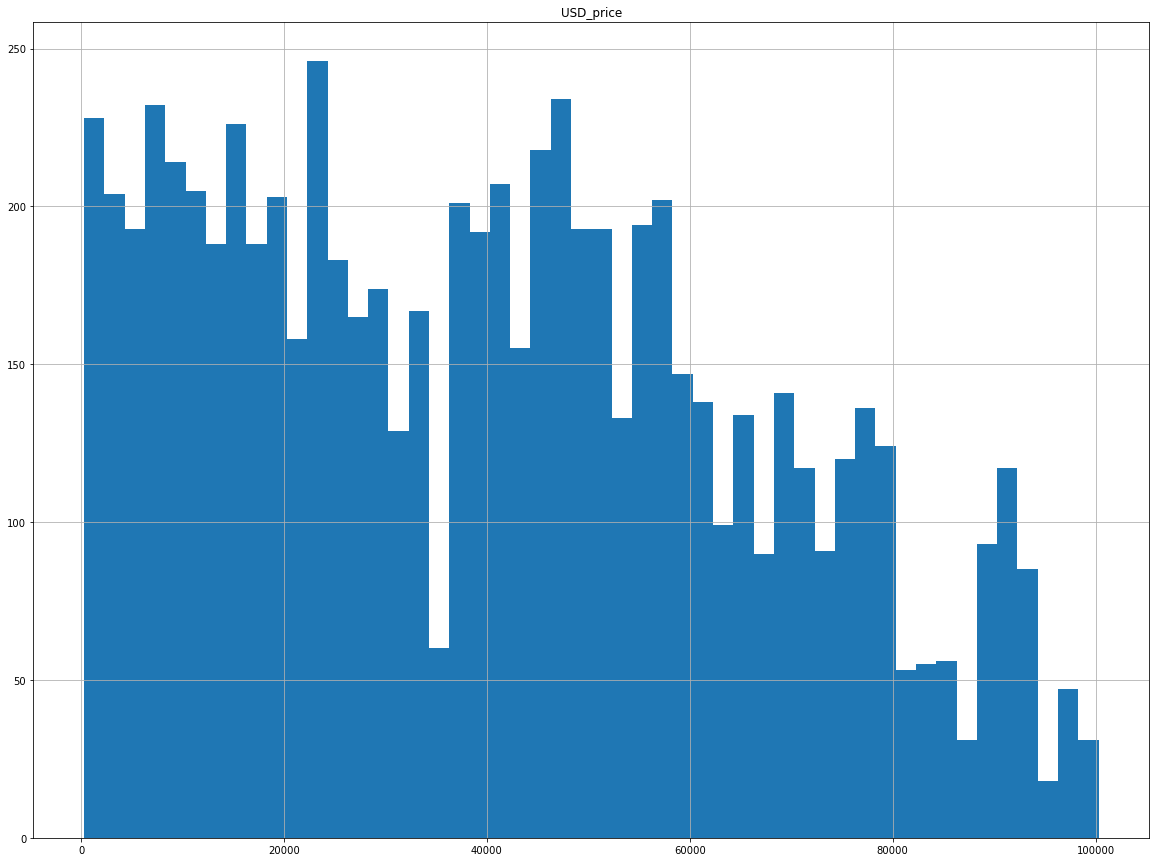

In [27]:
atttibutes_hist = train_set[['USD_price']].hist(bins=50, figsize=(20,15))
atttibutes_hist

We see that we have various prices with good distribution

Now, let's look at our numerical attributes:

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'l'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'lw_ratio'}>]], dtype=object)

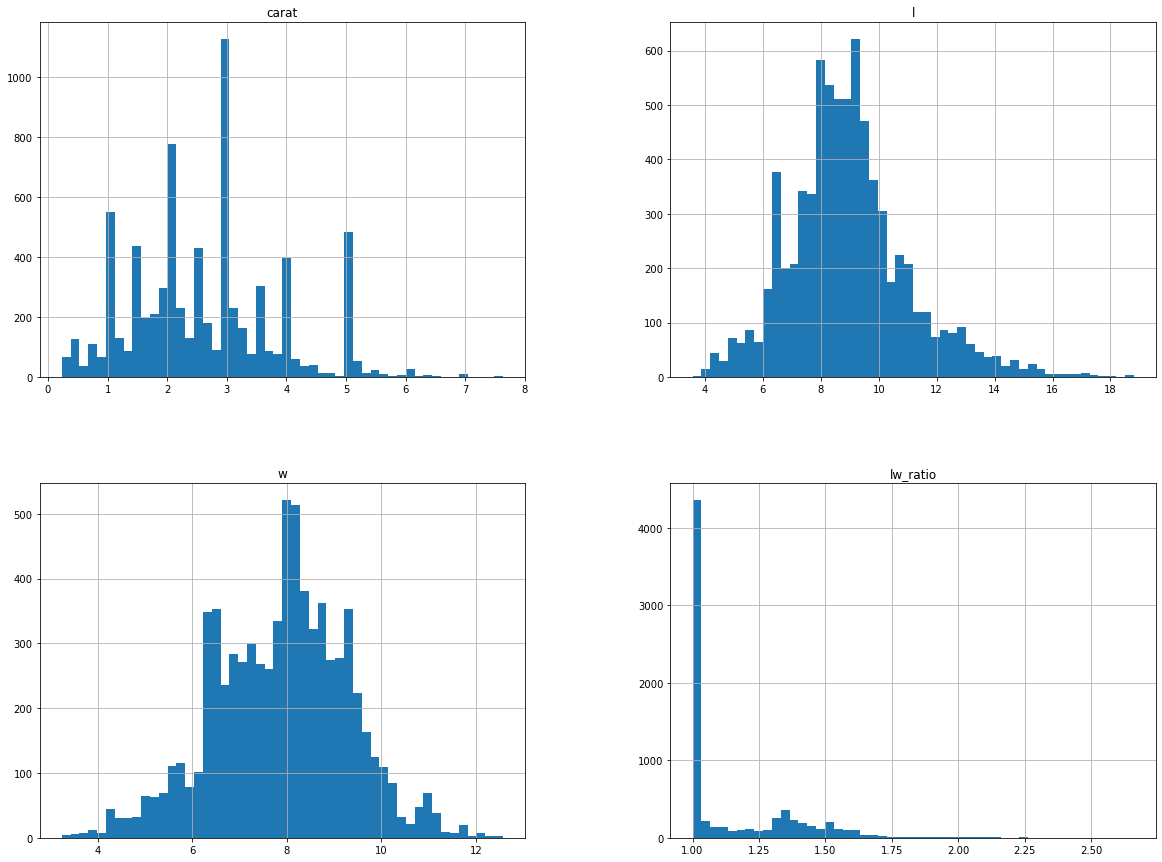

In [28]:
atttibutes_hist = train_set[['carat','l','w','lw_ratio']].hist(bins=50, figsize=(20,15))
atttibutes_hist

Let's look at our caterogial attributes

Text(0.5, 1.0, 'Certificate Distribution Pie Chart')

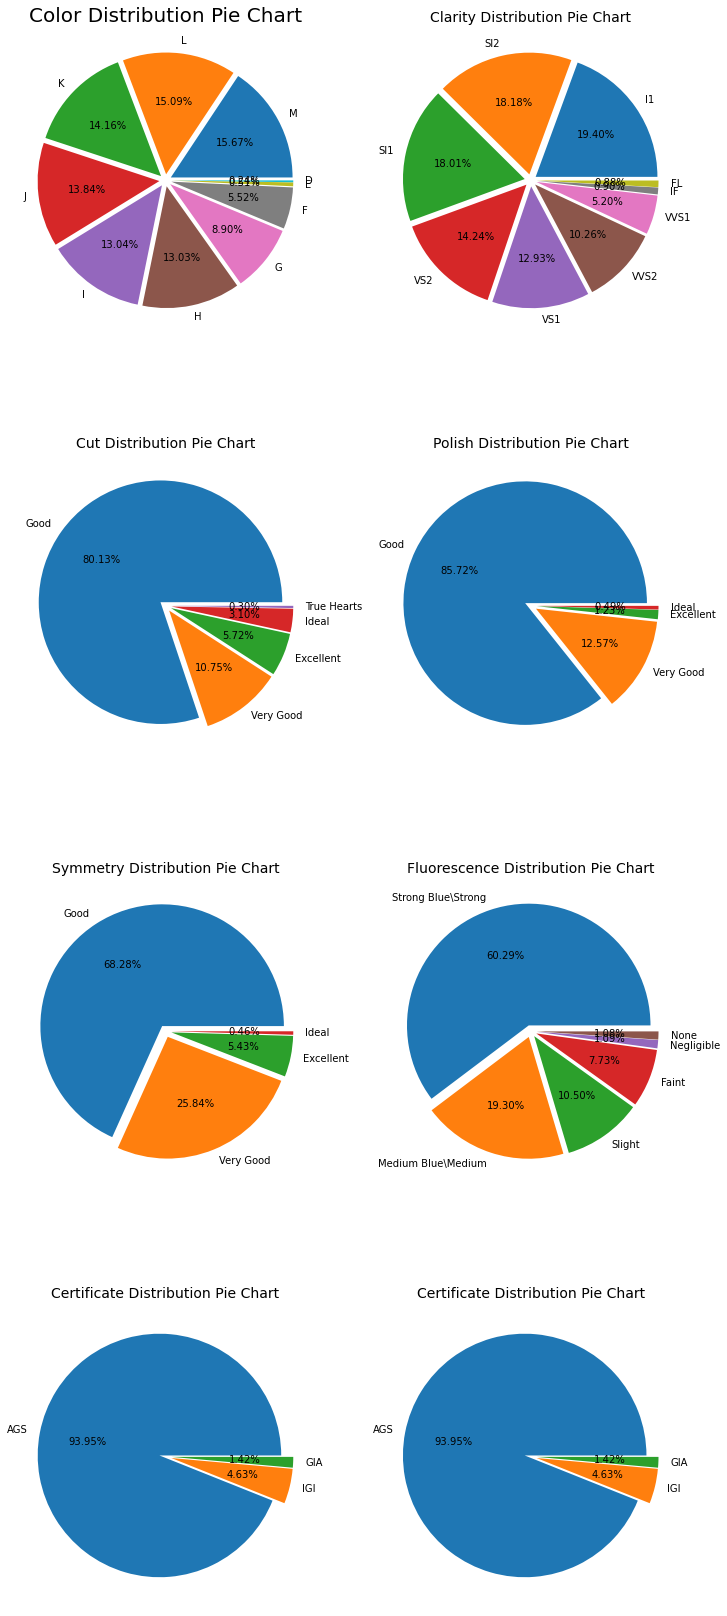

In [29]:
#color	clarity	cut	polish	shape	symmetry	fluorescence	certificate

fig, ax = plt.subplots(4,2, figsize = (12,30))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D']
values = train_set['color'].value_counts().tolist()[:len(labels)]
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax1.set_title("Color Distribution Pie Chart", fontdict={'fontsize': 20})

labels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL']
values = train_set['clarity'].value_counts().tolist()[:len(labels)]
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax2.set_title("Clarity Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['Good', 'Very Good', 'Excellent', 'Ideal', 'True Hearts']
values = train_set['cut'].value_counts().tolist()[:len(labels)]
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax3.set_title("Cut Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['Good', 'Very Good', 'Excellent', 'Ideal']
values = train_set['polish'].value_counts().tolist()[:len(labels)]
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax4.set_title("Polish Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['Good', 'Very Good', 'Excellent', 'Ideal']
values = train_set['symmetry'].value_counts().tolist()[:len(labels)]
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax5.set_title("Symmetry Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['Strong Blue\Strong', 'Medium Blue\Medium', 'Slight', 'Faint', 'Negligible', 'None']
values = train_set['fluorescence'].value_counts().tolist()[:len(labels)]
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax6.set_title("Fluorescence Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['AGS', 'IGI', 'GIA']
values = train_set['certificate'].value_counts().tolist()[:len(labels)]
ax7.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax7.set_title("Certificate Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['AGS', 'IGI', 'GIA']
values = train_set['certificate'].value_counts().tolist()[:len(labels)]
ax8.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax8.set_title("Certificate Distribution Pie Chart", fontdict={'fontsize': 14})

lets look at the numeric attributs- carat, l(length), w(width)


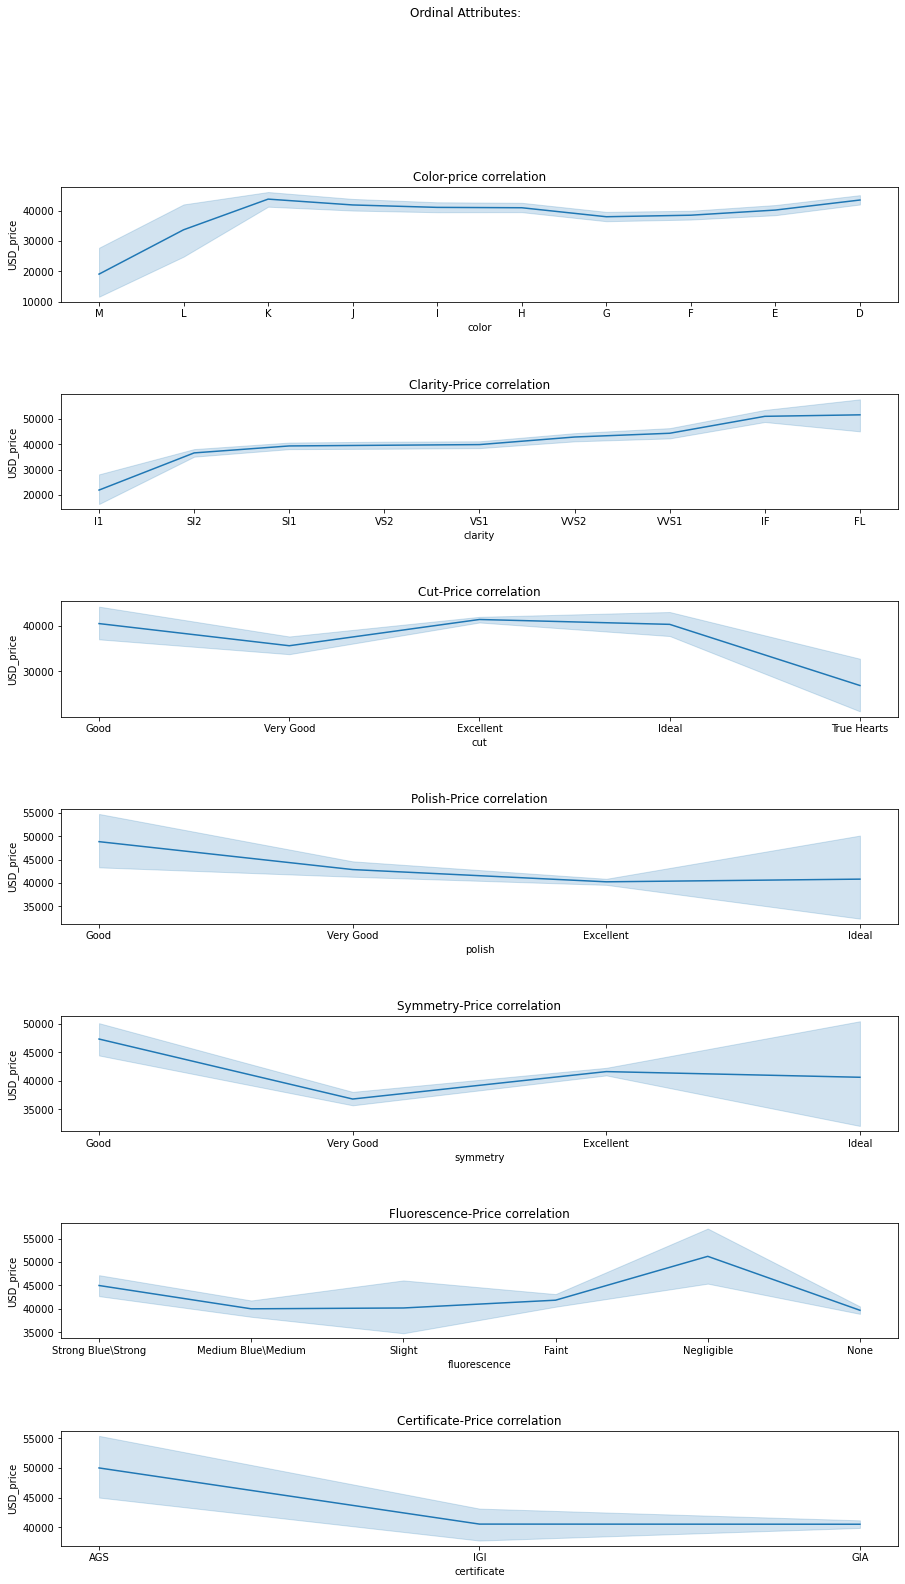

In [30]:
fig, ax = plt.subplots(7, 1, figsize=(15, 25))

(ax1,ax2,ax3,ax4,ax5,ax6,ax7)=ax
fig.suptitle('Ordinal Attributes:')


ax1.set_title("Color-price correlation")
color = sns.lineplot(ax=ax1, x='color', y="USD_price", data=train_set)
labels = ['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D']
color.set_xticks([i for i in range(1,len(labels)+1)])
color.set_xticklabels(labels)

ax2.set_title("Clarity-Price correlation")
clarity = sns.lineplot(ax=ax2, x="clarity", y="USD_price", data=train_set)
labels =['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL']
clarity.set_xticks([i for i in range(1,len(labels)+1)])
clarity.set_xticklabels(labels)

ax3.set_title("Cut-Price correlation")
cut = sns.lineplot(ax=ax3, x="cut", y="USD_price", data=train_set)
labels =['Good', 'Very Good', 'Excellent', 'Ideal', 'True Hearts']
cut.set_xticks([i for i in range(1,len(labels)+1)])
cut.set_xticklabels(labels)


ax4.set_title("Polish-Price correlation")
polish = sns.lineplot(ax=ax4, x="polish", y="USD_price", data=train_set)
labels=['Good', 'Very Good', 'Excellent', 'Ideal']
polish.set_xticks([i for i in range(1,len(labels)+1)])
polish.set_xticklabels(labels)

ax5.set_title("Symmetry-Price correlation")
symmetry = sns.lineplot(ax=ax5, x="symmetry", y="USD_price", data=train_set)
labels=['Good', 'Very Good', 'Excellent', 'Ideal']
symmetry.set_xticks([i for i in range(1,len(labels)+1)])
symmetry.set_xticklabels(labels)

ax6.set_title("Fluorescence-Price correlation")
fluorescence = sns.lineplot(ax=ax6, x="fluorescence", y="USD_price", data=train_set)
labels=['Strong Blue\Strong', 'Medium Blue\Medium', 'Slight', 'Faint', 'Negligible', 'None']
fluorescence.set_xticks([i for i in range(1,len(labels)+1)])
fluorescence.set_xticklabels(labels)

ax7.set_title("Certificate-Price correlation")
certificate = sns.lineplot(ax=ax7, x="certificate", y="USD_price", data=train_set)
labels=['AGS', 'IGI', 'GIA']
certificate.set_xticks([i for i in range(1,len(labels)+1)])
certificate.set_xticklabels(labels)

plt.subplots_adjust(hspace=0.8)

Assumptions:
1.From the second plot(Clarity) we assume that there is a positive corralation between the clarity and the diamond's price. 
2.From the last plot(Certificate) we assume that there is a negative corralation between the certificate and the diamond's price, Although because there is a large std it might not be true.
3.In the other plots it is hard to see a good corralation. 

Now let's look at the corralations of the numerical attributes to the price

Text(0.5, 1.0, 'Length-Width ratio-Price correlation')

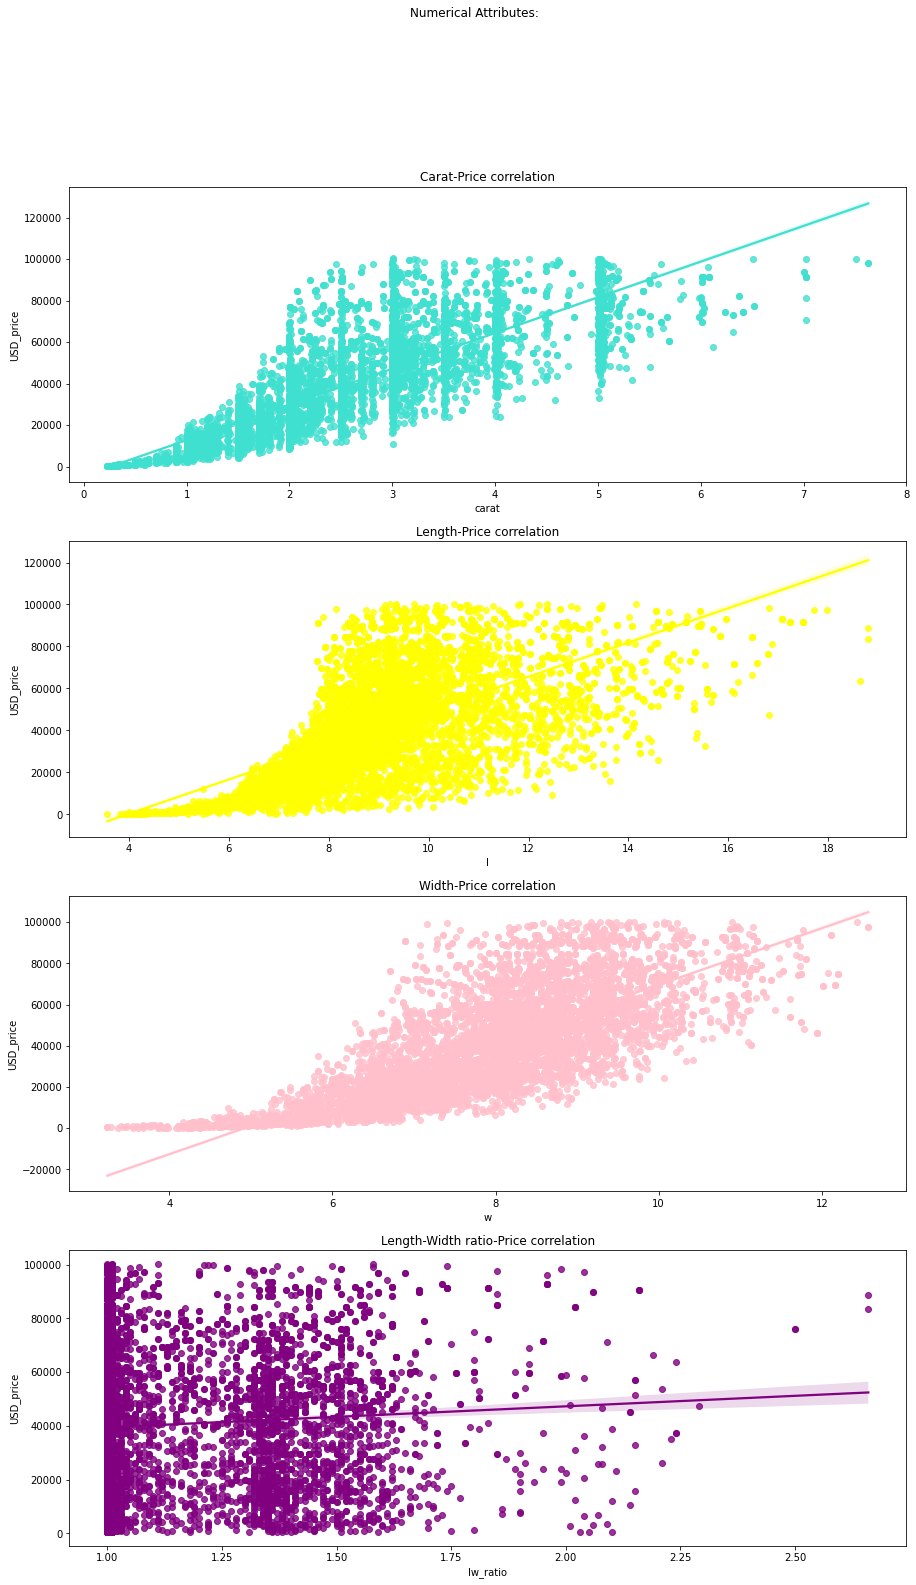

In [31]:
fig, ax = plt.subplots(4, 1, figsize=(15, 25))

(ax1,ax2,ax3,ax4)=ax
fig.suptitle('Numerical Attributes:')

sns.regplot(ax=ax1, data=train_set, x="carat", y="USD_price",color="Turquoise")
ax1.set_title("Carat-Price correlation")

sns.regplot(ax=ax2, data=train_set, x="l", y="USD_price",color="Yellow")
ax2.set_title("Length-Price correlation")

sns.regplot(ax=ax3, data=train_set, x="w", y="USD_price",color="Pink")
ax3.set_title("Width-Price correlation")

sns.regplot(ax=ax4, data=train_set, x="lw_ratio", y="USD_price",color="Purple")
ax4.set_title("Length-Width ratio-Price correlation")

Conclusions:

1.From the first three plots(Carat, Length and Width) we can clearly see that there is a storng positive corralation between the them and the diamond's price. (which is not a surprise to us because they are all connected to the diamond's size and logiclly the bigger the diamond is, the more expensive it is)

2.From the last plot(lengh-width ratio) we can see that there is no corralation between the lengh-width ratio and the diamond's price.

now, let's look at the categorical attribute-'Shape' and look for a corralation to the diamond's price:


<AxesSubplot:xlabel='shape', ylabel='USD_price'>

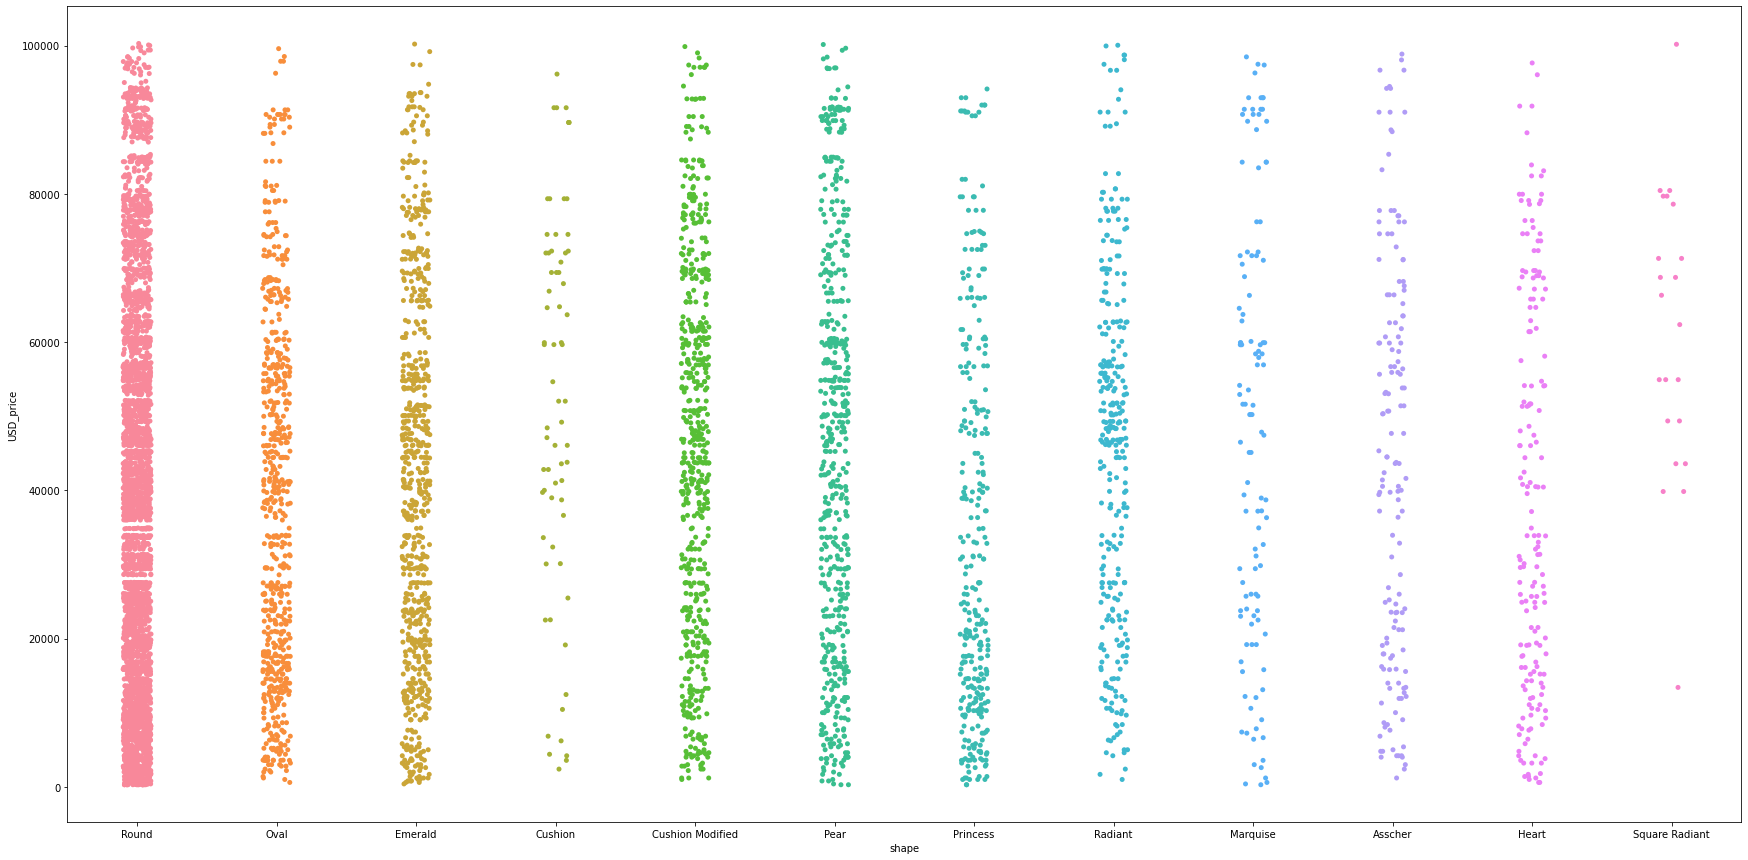

In [44]:
fig, axes = plt.subplots(1, 1, figsize=(30, 15))
#title('Shapes')
sns.stripplot(x="shape", y="USD_price", data=train_set)

Conclusion:
there is no corralation between the shape of the diamond and its price. each shape has diamond on the whole price range.
we can also see that the vast majority of the diamonds are round (as we could suspect- usually the diamonds we see are round..) 

now we will use the get_dummies method on the only categorical attribute- shape.

# get dummies for shape row

In [32]:
x_train= pd.get_dummies(x_train, columns=['shape'])
#We have to change the test data so the tarin and test data have the same columns
x_test= pd.get_dummies(x_test, columns=['shape'])
train_set=pd.concat((x_train,y_train),axis=1)
train_set.head()

Let's check out the heatmap

<AxesSubplot:>

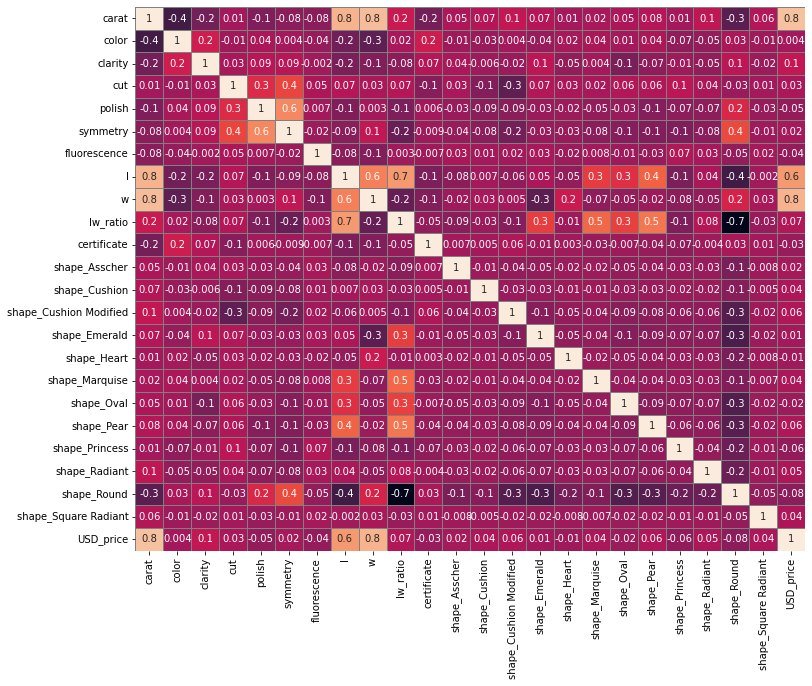

In [38]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(train_set.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.5, linecolor='grey')

In [39]:
corr_matrix = train_set.corr()
corr_matrix["USD_price"].sort_values(ascending = False)

USD_price                 1.000000
carat                     0.815153
w                         0.754079
l                         0.649513
clarity                   0.130711
lw_ratio                  0.067627
shape_Pear                0.060450
shape_Cushion Modified    0.058581
shape_Radiant             0.046339
shape_Square Radiant      0.043671
shape_Cushion             0.043270
shape_Marquise            0.037067
cut                       0.032124
symmetry                  0.018213
shape_Asscher             0.017081
shape_Emerald             0.011853
color                     0.004242
shape_Heart              -0.009587
shape_Oval               -0.020623
certificate              -0.031971
fluorescence             -0.043115
polish                   -0.045867
shape_Princess           -0.055686
shape_Round              -0.079388
Name: USD_price, dtype: float64

In [26]:
corr_matrix = df.corr()
corr_matrix["USD_price"].sort_values(ascending = False)

USD_price                 1.000000
carat                     0.812885
w                         0.752280
l                         0.646950
clarity                   0.140768
lw_ratio                  0.070641
shape_Pear                0.060264
shape_Cushion Modified    0.051806
shape_Cushion             0.044056
shape_Radiant             0.043793
shape_Square Radiant      0.042764
shape_Marquise            0.036293
cut                       0.031151
shape_Emerald             0.017680
shape_Asscher             0.017392
symmetry                  0.012548
color                     0.003569
shape_Heart              -0.012783
shape_Oval               -0.016795
certificate              -0.036161
fluorescence             -0.038124
polish                   -0.048684
shape_Princess           -0.052005
shape_Round              -0.080605
Name: USD_price, dtype: float64